# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image

# EDA

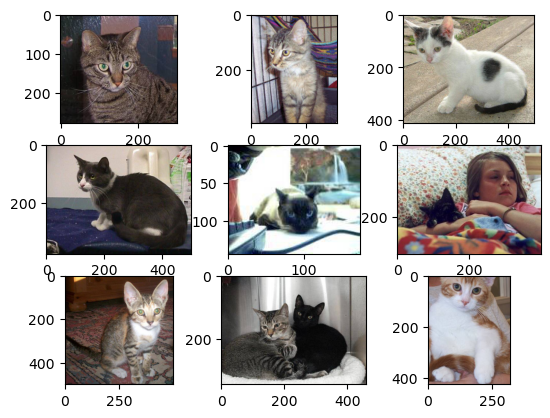

In [2]:
folder = "dataset/training_set" # onvolutional Neural Networks/dataset/training_set/cats/
for i in range(1,10):
    plt.subplot(330 + i)
    image_name = folder + "/cats/cat." + str(i) + ".jpg"
    file_name = plt.imread(image_name)
    plt.imshow(file_name)
plt.show()

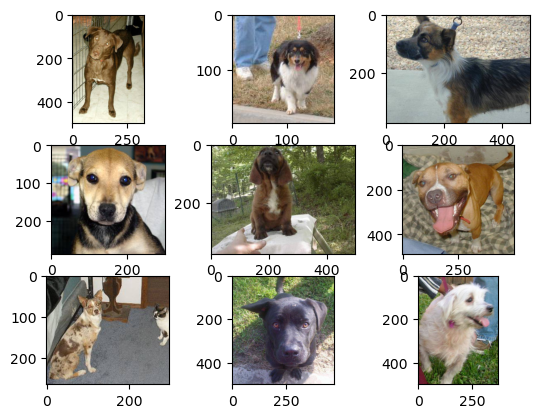

In [3]:
folder = "dataset/training_set"
for i in range (1,10):
    plt.subplot(330 +i)
    image_name = folder + "/dogs/dog." + str(i) + ".jpg"
    file_name = plt.imread(image_name)
    plt.imshow(file_name)
plt.show()

# Data Preprocessing

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
    shear_range= 0.2,
    horizontal_flip= True
)
train_set = train_datagen.flow_from_directory(
    "dataset/training_set",
    target_size = (227,227),
    batch_size = 32,
    class_mode = "binary"
)

Found 8000 images belonging to 2 classes.


In [6]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/255
)
test_set = test_datagen.flow_from_directory(
    "dataset/test_set",
    target_size = (227,227),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


# Building and Training CNN

 # AlexNet Architecture
    
     5 convolution layers
     
     3 Max Pooling layers
     
     2 Fully Connected Layers
     
     1 sigmoid Layer

In [7]:
model = tf.keras.models.Sequential()

model.add(InputLayer((227,227,3)))

model.add(Conv2D(filters = 96,
                 kernel_size = (11,11),
                 strides = (4,4),
                 activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (3,3), 
                    strides = (2,2)))

model.add(Conv2D(filters = 256, 
                 kernel_size = (5,5), 
                 strides = (1,1), 
                 activation = "relu", 
                 padding = "same"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (3,3), 
                    strides = (2,2)))

model.add(Conv2D(filters = 384, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 activation = "relu", 
                 padding = "same"))

model.add(BatchNormalization())

model.add(Conv2D(filters = 384, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 activation = "relu", 
                 padding = "same"))

model.add(BatchNormalization())

model.add(Conv2D(filters = 256, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 activation = "relu", 
                 padding = "same"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (3,3), 
                    strides = (2,2)))

model.add(Flatten())

model.add(Dense(units = 4096, 
                activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = 4096,
                activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = 2, 
                activation = "softmax"))
        

In [8]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(x = train_set, validation_data = test_set, epochs = 50)

Epoch 1/50
250/250 [==============================] - 505s 2s/step - loss: 3.0006 - accuracy: 0.5250 - val_loss: 0.6787 - val_accuracy: 0.5700
Epoch 2/50
250/250 [==============================] - 493s 2s/step - loss: 0.7672 - accuracy: 0.5605 - val_loss: 0.7272 - val_accuracy: 0.5865
Epoch 3/50
250/250 [==============================] - 489s 2s/step - loss: 0.7622 - accuracy: 0.5720 - val_loss: 0.6796 - val_accuracy: 0.5765
Epoch 4/50
250/250 [==============================] - 452s 2s/step - loss: 0.7471 - accuracy: 0.5822 - val_loss: 0.9473 - val_accuracy: 0.5220
Epoch 5/50
250/250 [==============================] - 522s 2s/step - loss: 0.7380 - accuracy: 0.5854 - val_loss: 0.7022 - val_accuracy: 0.5395
Epoch 6/50
250/250 [==============================] - 451s 2s/step - loss: 0.6993 - accuracy: 0.5987 - val_loss: 0.6957 - val_accuracy: 0.5660
Epoch 7/50
250/250 [==============================] - 423s 2s/step - loss: 0.6969 - accuracy: 0.6076 - val_loss: 0.7031 - val_accuracy: 0.5140

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

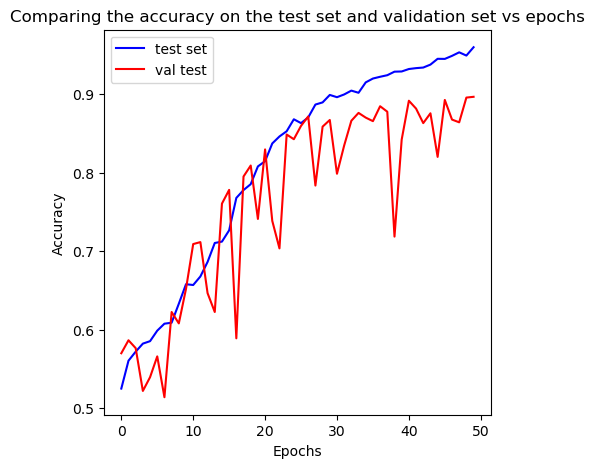

In [13]:
plt.figure(figsize = (5,5))
ta = history.history["accuracy"]
va = history.history["val_accuracy"]

plt.plot(ta, "blue", label = "test set")
plt.plot(va, "red", label = "val test")
plt.title("Comparing the accuracy on the test set and validation set vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

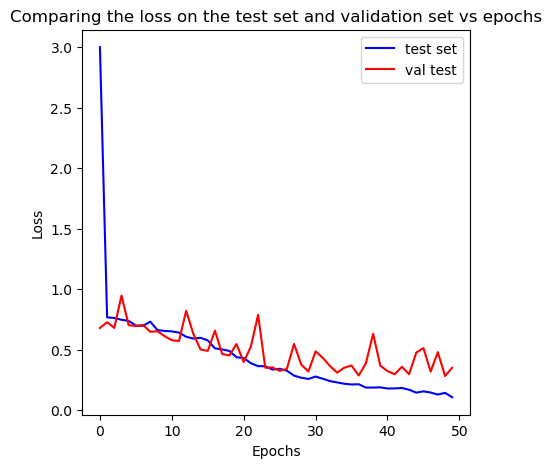

In [14]:
plt.figure(figsize = (5,5))
tl = history.history["loss"]
vl = history.history["val_loss"]

plt.plot(tl, "blue", label = "test set")
plt.plot(vl, "red", label = "val test")
plt.title("Comparing the loss on the test set and validation set vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [12]:
model.evaluate(test_set)

63/63 [==============================] - 53s 831ms/step - loss: 0.3500 - accuracy: 0.8965


[0.3499811589717865, 0.8964999914169312]